/home/romuald/ENSEIGNEMENT/0-JupyterNotebooks/pyPhysChem



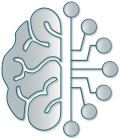

**Start at:** Monday 12 February 2024, 22:11:39  
**Hostname:** pc-55.home (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import fg,bg,hl,color
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

# Physical Chemistry Problems and Solutions

## Introduction

<div class="rqT" title = "Recommendation">

A basic knowledge and skills in the Python language and in the use of Computer Algebra Systems (CAS) is mandatory

You can first check such skills or develop them with the ["Python in the Physical Chemistry Lab (PPCL)" in a nutshell](./PPCL.ipynb) and [Computer Algebra System with Python (pCAS) in a nutshell](./pCAS.ipynb) notebooks.

</div>

## Prerequisite : physical constants and conversion factors

<div class="rqT" title="Directives">
    
It is recommended to use the [physical constants of the SciPy library](https://docs.scipy.org/doc/scipy/reference/constants.html) instead of a copy/paste of values found on internet.

**Run the next cell to import all necessary libraries as well as to initialize the physical constants and conversion factors necessary all throughout this notebook.**

</div>

In [2]:
import scipy.constants as sc
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
import molmass as mm

c = sc.value("speed of light in vacuum")
kB = sc.value("Boltzmann constant")
NA = sc.value("Avogadro constant")

h = sc.value("Planck constant")
hbar = sc.value("reduced Planck constant")
e = sc.value("elementary charge")
me = sc.value("electron mass")
mp = sc.value("proton mass")
a0 = sc.value("Bohr radius")
eps0 = sc.value("vacuum electric permittivity")
Rinf = sc.value("Rydberg constant")

t4pPC.centerTitle(f"Physical constants. Name of the variable: (physical constant, unit, uncertainty)")

print(f'{hl.BOLD}speed of light in vacuum, {fg.RED}c{fg.BLACK} variable: {sc.physical_constants["speed of light in vacuum"]}{hl.OFF}')
print(f'{hl.BOLD}Boltzmann constant, {fg.RED}kB{fg.BLACK} variable: {sc.physical_constants["Boltzmann constant"]}{hl.OFF}')
print(f'{hl.BOLD}Avogadro constant, {fg.RED}NA{fg.BLACK} variable: {sc.physical_constants["Avogadro constant"]}{hl.OFF}')
print()
print(f'{hl.BOLD}Planck constant, {fg.RED}h{fg.BLACK} variable: {sc.physical_constants["Planck constant"]}{hl.OFF}')
print(f'{hl.BOLD}Reduced Planck constant, {fg.RED}hbar{fg.BLACK} variable: {sc.physical_constants["reduced Planck constant"]}{hl.OFF}')
print(f'{hl.BOLD}Elementary charge, {fg.RED}e{fg.BLACK} variable: {sc.physical_constants["elementary charge"]}{hl.OFF}')
print(f'{hl.BOLD}Electron mass, {fg.RED}me{fg.BLACK} variable: {sc.physical_constants["electron mass"]}{hl.OFF}')
print(f'{hl.BOLD}Proton mass, {fg.RED}mp{fg.BLACK} variable: {sc.physical_constants["proton mass"]}{hl.OFF}')
print(f'{hl.BOLD}Vacuum electric permittivity, {fg.RED}eps0{fg.BLACK} variable: {sc.physical_constants["vacuum electric permittivity"]}{hl.OFF}')
print(f'{hl.BOLD}Rydberg constant, {fg.RED}Rinf{fg.BLACK} variable: {sc.physical_constants["Rydberg constant"]}{hl.OFF}')
print(f'{hl.BOLD}Bohr radius, {fg.RED}a0{fg.BLACK} variable: {sc.physical_constants["Bohr radius"]}{hl.OFF}')


print()
t4pPC.centerTitle(f"Conversion factors")
Eh = 2*Rinf*h*c
h2eV = Eh/e
print(f"{fg.BLUE}{hl.BOLD}Hartree (h) to electron-volt (eV) conversion factor, {fg.RED}h2eV{fg.BLUE} variable: 1h = {h2eV:.3f} eV{hl.OFF}")
u2kg = 1e-3/NA
print(f"{fg.BLUE}{hl.BOLD}Unified atomic mass unit (u) to kilogram (kg) conversion factor, {fg.RED}u2kg{fg.BLUE} variable: 1u = {u2kg:.3e} kg{hl.OFF}")


speed of light in vacuum, c variable: (299792458.0, 'm s^-1', 0.0)
Boltzmann constant, kB variable: (1.380649e-23, 'J K^-1', 0.0)
Avogadro constant, NA variable: (6.02214076e+23, 'mol^-1', 0.0)

Planck constant, h variable: (6.62607015e-34, 'J Hz^-1', 0.0)
Reduced Planck constant, hbar variable: (1.054571817e-34, 'J s', 0.0)
Elementary charge, e variable: (1.602176634e-19, 'C', 0.0)
Electron mass, me variable: (9.1093837015e-31, 'kg', 2.8e-40)
Proton mass, mp variable: (1.67262192369e-27, 'kg', 5.1e-37)
Vacuum electric permittivity, eps0 variable: (8.8541878128e-12, 'F m^-1', 1.3e-21)
Rydberg constant, Rinf variable: (10973731.56816, 'm^-1', 2.1e-05)
Bohr radius, a0 variable: (5.29177210903e-11, 'm', 8e-21)



Hartree (h) to electron-volt (eV) conversion factor, h2eV variable: 1h = 27.211 eV
Unified atomic mass unit (u) to kilogram (kg) conversion factor, u2kg variable: 1u = 1.661e-27 kg


## Rotational spectroscopy

<div class="intro">
    
[wikipedia page](https://en.wikipedia.org/wiki/Rotational_spectroscopy)

</div>

### Value of *J* corresponding to the most highly populated rotational energy level of a linear rotor at a temperature *T*

<div class="intro">

The population $\mathcal{P}_{J}$ of a rotational state at a given temperature *T* depends on two factors, the Boltzmann factor $\exp\left(-\frac{E_{J}}{k_{\mathrm{B}}T}\right)$ and the degeneracy of the rotational level, $g_J$. 

$$\mathcal{P}_{J}=g_{J}\exp\left(-\frac{E_{J}}{k_{\mathrm{B}}T}\right)=(2J+1)\exp\left(-\frac{E_{J}}{k_{\mathrm{B}}T}\right)$$

where:

$$E_{J}=hc\bar{B}J(J+1)$$

$\bar{B}$ is the rotational constant, defined as a wavenumber, *i.e.* in m<sup>-1</sup> and *J* is the rotational quantum number, which takes integer values between 0 and +∞. 

</div>

<div class="exE">

1. Define the population $\mathcal{P}_{J}$ as a `sympy` equation
2. Check that *J*<sub>max</sub>, the rotational level that has the highest probability to be occupied, is given by the equation

$$J_{\mathrm{max}}=\left(\frac{k_{\mathrm{B}}T}{2hc\bar{B}}\right)^{1/2}-\frac{1}{2}$$ 

</div>

In [3]:
# insert your code here



<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [25]:
# %load ./SolutionsToExercises/PhysChemPbSol/JmaxEq.py

<div class="exE">

The rotational constant of the linear O=C=S molecule is $\bar{B}$ = 0.20286 cm<sup>-1</sup>

1. Calculate *J*<sub>max</sub> at room temperature
2. Plot *J*<sub>max</sub> as a function of *T*, in the range [0K, 1000K]

</div>

In [5]:
# insert your code here



<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [26]:
# %load ./SolutionsToExercises/PhysChemPbSol/JmaxPlot.py

### Interatomic bond length of the <sup>1</sup>H<sup>79</sup>Br diatomic molecule

<div class="exE">

The rotational spectrum of the <sup>1</sup>H<sup>79</sup>Br molecule is made up of equidistant vertical lines, with $\Delta \bar{\nu}$ = 16.702 cm<sup>-1</sup>. All equations will be written for the linear rotor:

1. Use the <sup>1</sup>H and <sup>79</sup>Br masses available in the`molmass` library
2. Define the $F_J$ equation as a `sympy` equation
3. Express $\Delta \bar{\nu}$ as a function of $\bar{B}$
</div>

In [7]:
# insert your code here



<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [27]:
# %load ./SolutionsToExercises/PhysChemPbSol/HBr-part1.py


<div class="exE">

4. For the linear rotor, the moment of inertia *I* is related to $\bar{B}$ by the equation:
   $$I = \frac{\hbar}{4\pi c \bar{B}}$$
   For a diatomic molecule, *I* is also given by:
   $$I = \mu R_\mathrm{eq}^2$$
   where $\mu$ is the reduced mass of the molecule.
   
   1. Express $R_\mathrm{eq}$ as a function of *I*, $\mu$ and $\bar{B}$
   2. Calculate $\mu$ 
   3. Calculate the equilibrium bond length of the <sup>1</sup>H<sup>79</sup>Br diatomic molecule

</div>

In [ ]:
# insert your code here



<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [28]:
# %load ./SolutionsToExercises/PhysChemPbSol/HBr-part2.py

# End

In [29]:
vID.end(cwd0)

**End at:** Monday 12 February 2024, 22:15:53  
**Duration:** 00:04:14 998ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>